In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("dataset\\titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Handling the Null values

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

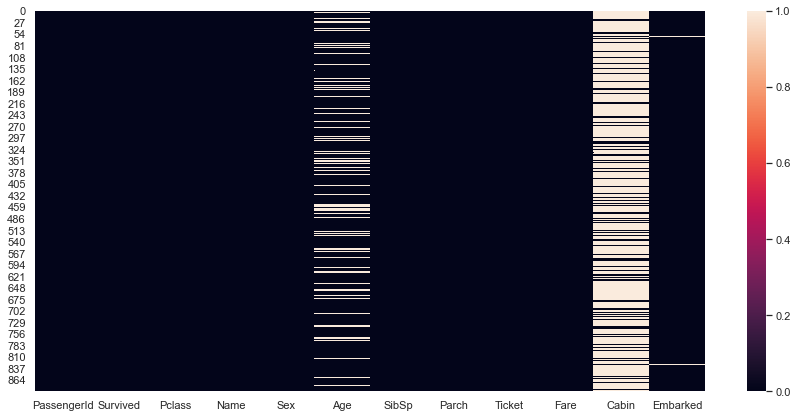

In [4]:
plt.figure(figsize= (15,7))
sns.heatmap(data.isnull())

In [5]:
###Droping the cabin because its having more than 50% null value

In [6]:
data = data.drop(['Cabin'],axis = 1)

In [7]:
data["Age"] = data["Age"].fillna(data['Age'].mean())#replacing the null value of age with mean and of embarked with mode
data['Embarked'] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Handling categorical features

In [10]:
cols = ['Sex','Embarked',"Pclass"]
for col in cols:
    data=pd.concat([data,pd.get_dummies(data[col],prefix=col,drop_first = True)],axis=1)
    data.drop([col],axis = 1,inplace = True)

In [11]:
data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,0,1,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,0,0,0,0


### Handling correlated fetures

<AxesSubplot:>

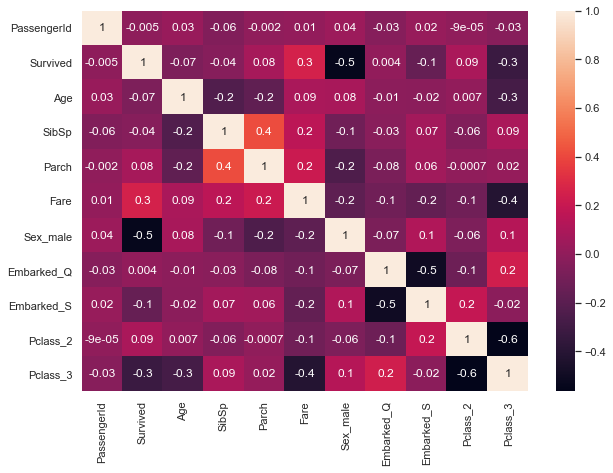

In [12]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot = True, fmt = '.1g')

In [13]:
x_corr = data.drop(['Survived'],axis = 1).corr()
UPPER = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))
correlated_features = [column for column in UPPER.columns if any(UPPER[column] >0.75)]
print(correlated_features,'\n',len(correlated_features))

[] 
 0


### There is no correlated feature to handle

In [14]:
## Finding the most relevant feature towards target

In [15]:
cor = data.corr()
cor_target = abs(cor["Survived"])
relevant_feature = cor_target[cor_target>0.50]
relevant_feature = pd.DataFrame(relevant_feature)
relevant_feature

,Survived
Survived,1.000000
Sex_male,0.543351


### Removing outliers (if any)

In [16]:
from scipy.stats import norm

<AxesSubplot:xlabel='Age', ylabel='Density'>

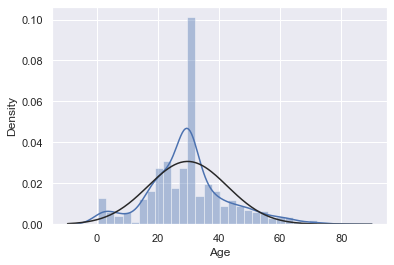

In [17]:
sns.distplot(data.Age,fit = norm)

<AxesSubplot:xlabel='Sex_male', ylabel='Density'>

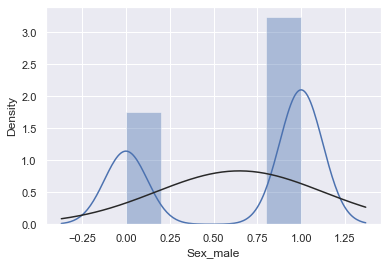

In [18]:
sns.distplot(data.Sex_male,fit = norm)

### checking the assumptions

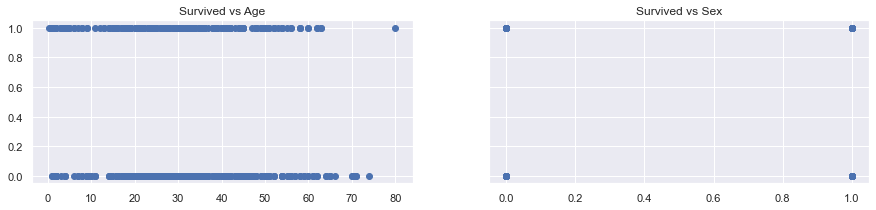

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data.Age,data.Survived)
ax1.set_title('Survived vs Age')
ax2.scatter(data.Sex_male,data.Survived)
ax2.set_title('Survived vs Sex')
plt.show()

#### Checking for Mullticollinearity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[ ['Survived','Age', 'SibSp', 'Parch',
       'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [21]:
vif

,VIF,features
0,1.939457,Survived
1,4.737705,Age
2,1.572548,SibSp
3,1.625781,Parch
4,2.062450,Fare
5,3.523094,Sex_male
6,1.595124,Embarked_Q
7,4.930960,Embarked_S
8,2.019981,Pclass_2
9,3.819408,Pclass_3


In [22]:
y = data["Survived"]
x = data.drop(["Survived",'Name','Ticket'],axis = 1)
x

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.000000,1,0,7.2500,1,0,1,0,1
1,2,38.000000,1,0,71.2833,0,0,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1,0,1
3,4,35.000000,1,0,53.1000,0,0,1,0,0
4,5,35.000000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,27.000000,0,0,13.0000,1,0,1,1,0
887,888,19.000000,0,0,30.0000,0,0,1,0,0
888,889,29.699118,1,2,23.4500,0,0,1,0,1
889,890,26.000000,0,0,30.0000,1,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 6)

### Model and prediction

In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)
ypred = model.predict(x_test)
ypred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

### Validating the results(using accuracy, confusion matrix and classification report metrices)

In [25]:
accuracy_score(y_test,ypred)

0.8603351955307262

In [26]:
print("Confusion Matrix: \n",confusion_matrix(y_test,ypred))

Confusion Matrix: 
 [[106   7]
 [ 18  48]]


In [27]:
print("Classification Report: \n",classification_report(y_test,ypred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       113
           1       0.87      0.73      0.79        66

    accuracy                           0.86       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179

